# Mathematical exercises

Solutions to the following exercises may be either typed into the submitted Jupyter notebook, or handwritten solutions may be scanned and submitted as a separate PDF file.


**Exercise 1** (3 points): Problem 3.11 from the PRML textbook.

**Exercise 2** (3 points): In class we used the following formula for matrix inversion:
$$
(A^{-1} + \vec{u}\vec{v}^\top)^{-1} = A - \frac{A \vec{u} \vec{v}^\top A}{1 + \vec{v}^T A \vec{u}}
$$
where $A$ is an invertible matix. In addition to helping us prove our result about Bayesian regression, this formula is often useful because, although computing a matrix inverse is computationally costly in general, if we are just adding a rank-one perturbation to a matrix whose inverse we already know, inverting the new matrix is not so costly. Prove the above formula.

# Coding exercises

Reminder: Once your notebook is complete, you should restart the kernel, run all of the cells in order, and make sure that no errors occur. Notebooks that run successfully without errors will be awarded one extra credit point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear regression with regularization

Let us return to the regression problem that we studied in the first homework assignment. In that assignment, we showed that cross-validation, i.e. splitting data into training and testing sets, can be an effective strategy to combat overfitting. In this assignment, we'll look at another strategy to combat overfitting: regularization.

As before, let's make some fake data from a sine wave with added noise.

Text(0, 0.5, 'y')

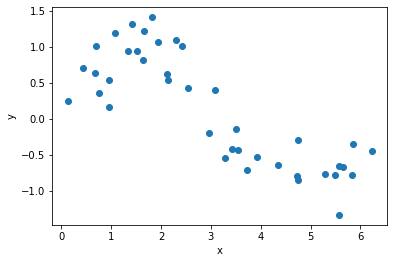

In [2]:
n = 40  # number of data points

# Simulated data:
x_data = 2*np.pi*np.random.rand(n)
noise_amp = 0.3
noise = noise_amp*np.random.randn(n)
y_data = np.sin(x_data) + noise

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')

Next, as in our class demo, let's create polynomial feature vectors from the data and plot the prediction curve:

Text(0, 0.5, 'y')

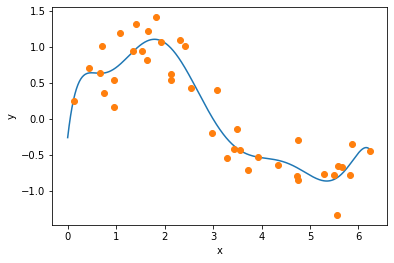

In [3]:
m = 10  # number of feature vectors (i.e. m-1 is the order of the polynomial)
alpha = 0.0  # regularization parameter

# Create the design matrix:
phi = np.zeros((n, m))
for j in range(m):
    phi[:,j] = x_data**j

# The weight vector minimizing the mean squared error:
w = np.linalg.inv(alpha*np.eye(m) + phi.T @ phi) @ phi.T @ y_data

# To plot the prediction curve, create an array of x data and corresponding y data:
x_array = np.arange(0, 2*np.pi, 0.01)
y_pred = np.zeros_like(x_array)
for i, x in enumerate(x_array):
    y_pred[i] = np.sum([w[j]*x**j for j in range(m)])
    
plt.plot(x_array, y_pred)
plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')

**Exercise 1** (3 pts): Turn the above block of code into a function, `mse(x_data, y_data, m, alpha)`, that fits a polynomial with `m` parameters to data with regularization parameter `alpha`, as in the above block of code, and returns the MSE. Use this function to plot the MSE for different values of `alpha`, using `plt.semilogx()` to scale the x-axis logarithmically. Explain why the curve that you plot looks the way that it does.

In [1]:
## Solution ##


**Exercise 2** (3 points): Create another version of the function from above, calling the new version `mse_cv(x_data, y_data, m, alpha, cv, make_plot)`, that takes two new Boolean arguments. 
- If `cv=True`, perform cross-validation by splitting the data into training and testing sets and performing the fit with just the training data. The function should return both the MSE computed with the training data and the MSE computed with the testing data. 
- If `make_plot=True`, plot the data together with the fit. If cross-validation is used, plot the training and testing data in separate colors, with a legend to distinguish them.

In [2]:
## Solution  ##



**Exercise 3** (3 points): Use the above function to make a plot of both the training and testing MSE for various values of `alpha`. (This will work best if the values are evenly spaced on a log scale.) Report the value of `alpha` (an approximate value is fine) that minimizes the testing MSE. Finally, use the `make_plot` option in the function above to make two plots of the data along with the fits, where one fit doesn't use regularization, and the other fit uses the optimal value that was just found.

In [3]:
## Solution ##



In [4]:
## Solution ##



## Linear regression with a built-in function

Now let's get the same results with less work using a built-in package. 

**Exercise 4** (3 points): Read the documentation for `linear_model.LinearRegression()` from the `sklearn` library, which contains implementations of lots of standard machine algorithms. Following the example in the documentation, and without using regularization, fit a linear model to the first half of our data, then use the `.score()` method to quantify the goodness of fit for both the training set and the testing set. (Note that the score being returned by this function is given by $r^2 = 1 - \mathrm{MSE}/\sigma^2$, where $\sigma^2$ is the variance of the data along the y dimension. This means that scores close to 1 are very good, while negative scores or scores close to zero are bad.) Plot the fit along with the data, with the training and testing data in different colors. The result should match the plot we made above.

In [11]:
from sklearn import linear_model

In [5]:
## Solution ##



**Exercise 5** (3 points): Repeat the previous exercise, now using `linear_model.RidgeCV()`, which uses ridge regression (i.e. regularized just as with our `alpha` parameter above) with built-in cross validation (i.e. cross-validation is used to select the best regularization value as we did above, then the result is reported using this optimal value). You should find that the scores for the training and testing datasets are much more similar than before.

In [6]:
## Solution ##

